In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Observing Data

In [148]:
cabdata = pd.read_csv(r'C:\Users\Tahsin\DataGlacier-Week-2\Cab_Data.csv')
city = pd.read_csv(r'C:\Users\Tahsin\DataGlacier-Week-2\City.csv')
customer = pd.read_csv(r'C:\Users\Tahsin\DataGlacier-Week-2\Customer_ID.csv')
transaction = pd.read_csv(r'C:\Users\Tahsin\DataGlacier-Week-2\Transaction_ID.csv')

In [149]:
cabdata.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [150]:
city.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [151]:
customer.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [152]:
transaction.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


# Potential Hypothesis

#### -Which company was chosen by wealthy customers in large cities?

#### -Do males spend more in one company than females?

#### -Is there a preference for one company based on the transaction method?

#### -Do wealthier customers pay by card

#### -Which company generates the best money based on city proportion

# Analyzing Data

In [153]:
len(cabdata)

359392

In [154]:
len(customer)

49171

In [155]:
len(city)

20

In [156]:
len(transaction)

440098

In [157]:
#Merging data of transaction and cab data based on same column 'Transaction ID'
merged = cabdata.merge(transaction, on=['Transaction ID'])
merged

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [158]:
merged_city_count = merged.groupby('City')['Transaction ID'].count()
merged_company_count = merged.groupby('Company')['Transaction ID'].count()
merged_company_count[1] - merged_company_count[0]

189970

Note 1: Yellow Cab has 189970 more transactions than Pink Cab in this recorded data 

In [159]:
cmerge = customer.merge(transaction, on=['Customer ID'])
cmerge_pay = cmerge.groupby('Payment_Mode')['Payment_Mode'].count()
cmerge_pay

Payment_Mode
Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [160]:
f_merge = merged.merge(customer, on=['Customer ID'])
pay_cab = f_merge.groupby(['Company', 'Payment_Mode'])['Transaction ID'].count()
pay_cab

Company     Payment_Mode
Pink Cab    Card             50719
            Cash             33992
Yellow Cab  Card            164785
            Cash            109896
Name: Transaction ID, dtype: int64

In [161]:
pay_cab[1]/pay_cab[0] * 100

67.0202488219405

In [162]:
pay_cab[3]/pay_cab[2] * 100

66.69053615316928

Note 2: Regardless of company, the ratio of card to cash payers is pretty much the same 

In [163]:
f_merge[f_merge['Company']=='Pink Cab']['Price Charged'].mean()

310.800856205215

In [164]:
f_merge[f_merge['Company']=='Yellow Cab']['Price Charged'].mean()

458.1819899811107

In [165]:
f_merge[f_merge['Company']=='Pink Cab']['KM Travelled'].mean()

22.559916775861296

In [166]:
f_merge[f_merge['Company']=='Yellow Cab']['KM Travelled'].mean()

22.56951689414248

Note 3: Despite an average of similar lengths, Yellow Cab is being paid more

In [176]:
yellow_f = f_merge[f_merge['Company']=='Yellow Cab'][['Company', 'Price Charged', 'KM Travelled']]
pink_f = f_merge[f_merge['Company']=='Pink Cab'][['Company', 'Price Charged', 'KM Travelled']]

In [184]:
ratio_yellow = yellow_f['Price Charged']/yellow_f['KM Travelled']
ratio_pink = pink_f['Price Charged']/pink_f['KM Travelled']

In [189]:
ratio_yellow

1         22.859870
2         18.614571
4         19.821330
5         22.394822
8         17.785354
            ...    
359387    15.677071
359388    20.260204
359389    15.987895
359390    16.503571
359391    18.394737
Length: 274681, dtype: float64

In [190]:
ratio_pink

0         12.182266
3         12.526904
6         12.474235
7         13.849558
11        11.377751
            ...    
359331    14.052852
359332    12.863075
359333    17.369771
359334    12.841212
359335    11.176715
Length: 84711, dtype: float64

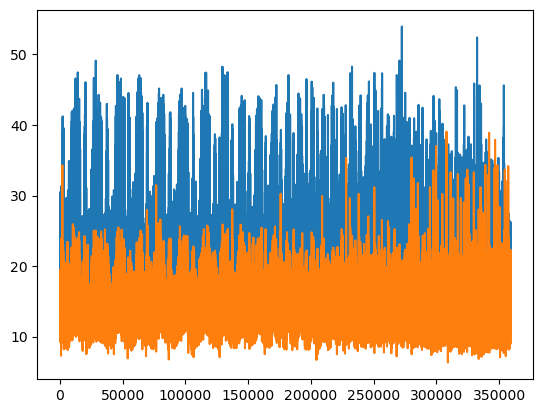

In [188]:
plt.plot(ratio_yellow)
plt.plot(ratio_pink)

plt.show()

It is clear that Yellow Cab is charging more per kilometer than Pink Cab. Although from a customer standpoint, Pink Cab would be a better choice, from the business standpoint, and that of the project, there is more evidence to suggest investing in Yellow Cab is more beneficial.

In [193]:
f_merge[f_merge['Company']=='Yellow Cab']['Income (USD/Month)'].mean()

15045.669816987705

In [194]:
f_merge[f_merge['Company']=='Pink Cab']['Income (USD/Month)'].mean()

15059.04713673549

Both Yellow Cab and Pink Cab users make fairly the same amount of money. This means that income does not exactly have an effect on whether yellow or pink cab is chosen